<a href="https://colab.research.google.com/github/arifadli/kuliahAI2021/blob/main/Logika%20Fuzzy/uas_ikbal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
! pip install scikit-fuzzy
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt
import pandas as pd

     |████████████████████████████████| 1.0MB 6.7MB/s 
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-cp37-none-any.whl size=894088 sha256=42981a9bb596bfbb1c6d382985869e40376a669c80a4996e1afd8b46617e7a86
  Stored in directory: /root/.cache/pip/wheels/b9/4e/77/da79b16f64ef1738d95486e2731eea09d73e90a72465096600
Successfully built scikit-fuzzy


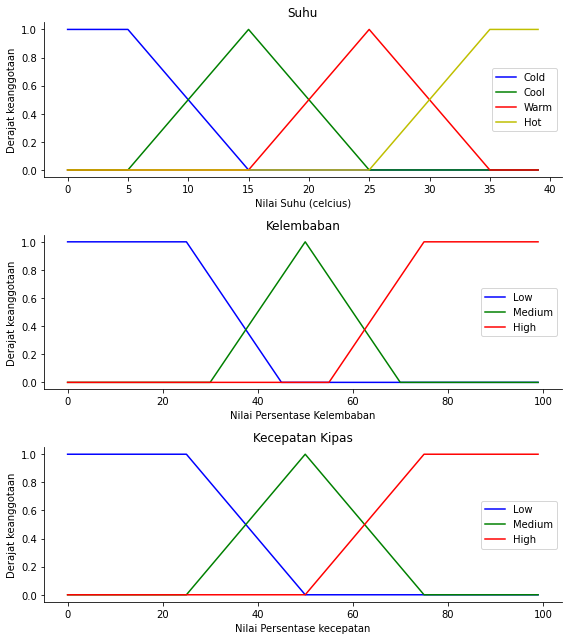

In [9]:
# Generate universe variables
x_suhu = np.arange(0, 40, 1) 
x_kelembaban = np.arange(0, 100, 1) 
x_kecepatan = np.arange (0, 100, 1)
 
# Generate fuzzy membership functions
suhu_cold = fuzz.trapmf(x_suhu, [0, 0, 5, 15])
suhu_cool = fuzz.trimf (x_suhu, [5, 15, 25])
suhu_warm = fuzz.trimf (x_suhu, [15, 25, 35])
suhu_hot = fuzz.trapmf (x_suhu, [25, 35, 40, 40])
kelembaban_low = fuzz.trapmf (x_kelembaban, [0, 0, 25, 45])
kelembaban_med = fuzz.trimf (x_kelembaban, [30, 50, 70])
kelembaban_high = fuzz.trapmf (x_kelembaban, [55, 75, 100, 100])
kecepatan_low = fuzz.trapmf (x_kecepatan, [0, 0, 25, 50])
kecepatan_med = fuzz.trimf (x_kecepatan, [25, 50, 75])
kecepatan_high = fuzz.trapmf (x_kecepatan, [50, 75, 100, 100])
 
# Visualize these universes and membership functions
fig, (ax0, ax1, ax2) = plt.subplots(nrows=3, figsize=(8, 9))
 
ax0.plot(x_suhu, suhu_cold, 'b', linewidth=1.5, label='Cold')
ax0.plot(x_suhu, suhu_cool, 'g', linewidth=1.5, label='Cool')
ax0.plot(x_suhu, suhu_warm, 'r', linewidth=1.5, label='Warm')
ax0.plot(x_suhu, suhu_hot, 'y', linewidth=1.5, label='Hot')
ax0.set_title('Suhu')
ax0.set_xlabel('Nilai Suhu (celcius)')
ax0.set_ylabel('Derajat keanggotaan')
ax0.legend()
 
ax1.plot(x_kelembaban, kelembaban_low, 'b', linewidth=1.5, label='Low')
ax1.plot(x_kelembaban, kelembaban_med, 'g', linewidth=1.5, label='Medium')
ax1.plot(x_kelembaban, kelembaban_high, 'r', linewidth=1.5, label='High')
ax1.set_title('Kelembaban')
ax1.set_xlabel('Nilai Persentase Kelembaban')
ax1.set_ylabel('Derajat keanggotaan')
ax1.legend()
 
ax2.plot(x_kecepatan, kecepatan_low, 'b', linewidth=1.5, label='Low')
ax2.plot(x_kecepatan, kecepatan_med, 'g', linewidth=1.5, label='Medium')
ax2.plot(x_kecepatan, kecepatan_high, 'r', linewidth=1.5, label='High')
ax2.set_title('Kecepatan Kipas')
ax2.set_xlabel('Nilai Persentase kecepatan')
ax2.set_ylabel('Derajat keanggotaan')
ax2.legend()
 
# Turn off top/right axes
for ax in (ax0, ax1, ax2):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()
 
plt.tight_layout()

In [15]:
level_suhu_cold = fuzz.interp_membership(x_suhu, suhu_cold, 35)
level_suhu_cool = fuzz.interp_membership(x_suhu, suhu_cool, 35)
level_suhu_warm = fuzz.interp_membership(x_suhu, suhu_warm, 35)
level_suhu_hot = fuzz.interp_membership(x_suhu, suhu_hot, 35)

level_kelembaban_low = fuzz.interp_membership(x_kelembaban, kelembaban_low, 65)
level_kelembaban_med = fuzz.interp_membership(x_kelembaban, kelembaban_med, 65)
level_kelembaban_high = fuzz.interp_membership(x_kelembaban, kelembaban_high, 65)

In [16]:
active_rule1 = np.fmax(level_kelembaban_low, level_suhu_hot)
active_rule2 = np.fmax(level_kelembaban_low, level_suhu_warm)
active_rule3 = np.fmax(level_kelembaban_med, level_suhu_hot)
active_rule4 = np.fmax(level_kelembaban_med, level_suhu_warm)
active_rule5 = np.fmax(level_kelembaban_med, level_suhu_cool)
active_rule6 = np.fmax(level_kelembaban_high, level_suhu_cool)
active_rule7 = np.fmax(level_kelembaban_high, level_suhu_cold)

In [17]:
kecepatan_activation_high1 = np.fmin(active_rule1, kecepatan_high)
kecepatan_activation_high2 = np.fmin(active_rule2, kecepatan_high)
kecepatan_activation_med1 = np.fmin(active_rule3, kecepatan_med)
kecepatan_activation_med2 = np.fmin(active_rule4, kecepatan_med)
kecepatan_activation_med3 = np.fmin(active_rule5, kecepatan_med)
kecepatan_activation_low1 = np.fmin(active_rule6, kecepatan_low)
kecepatan_activation_low2 = np.fmin(active_rule7, kecepatan_low)
kecepatan0 = np.zeros_like(x_kecepatan)

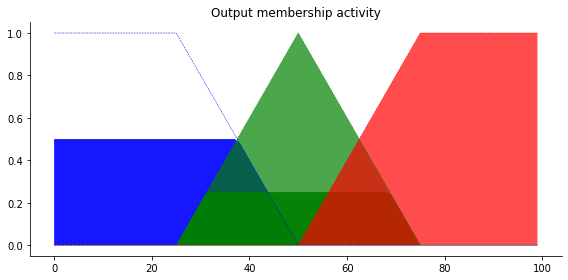

In [18]:
# Visualize this
fig, ax0 = plt.subplots(figsize=(8, 4))

ax0.fill_between(x_kecepatan, kecepatan0, kecepatan_activation_low1, facecolor='b', alpha=0.7)
ax0.fill_between(x_kecepatan, kecepatan0, kecepatan_activation_low2, facecolor='b', alpha=0.7)
ax0.plot(x_kecepatan, kecepatan_low, 'b', linewidth=0.5, linestyle='--', )
ax0.fill_between(x_kecepatan, kecepatan0, kecepatan_activation_med1, facecolor='g', alpha=0.7)
ax0.fill_between(x_kecepatan, kecepatan0, kecepatan_activation_med2, facecolor='g', alpha=0.7)
ax0.fill_between(x_kecepatan, kecepatan0, kecepatan_activation_med3, facecolor='g', alpha=0.7)
ax0.plot(x_kecepatan, kecepatan_med, 'g', linewidth=0.5, linestyle='--')
ax0.fill_between(x_kecepatan, kecepatan0, kecepatan_activation_high1, facecolor='r', alpha=0.7)
ax0.fill_between(x_kecepatan, kecepatan0, kecepatan_activation_high2, facecolor='r', alpha=0.7)
ax0.plot(x_kecepatan, kecepatan_high, 'r', linewidth=0.5, linestyle='--')
ax0.set_title('Output membership activity')

# Turn off top/right axes
for ax in (ax0,):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()

plt.tight_layout()


In [19]:
aggregated = np.fmax(np.fmax(kecepatan_activation_high1, kecepatan_activation_high2),
                     np.fmax(kecepatan_activation_med1, kecepatan_activation_med2, kecepatan_activation_med3), 
                     np.fmax(kecepatan_activation_low1, kecepatan_activation_low2))

# Calculate defuzzified result
kecepatan = fuzz.defuzz(x_kecepatan, aggregated, 'centroid')
print(kecepatan)

68.42803715767884
